<a href="https://colab.research.google.com/github/sdinesh01/recreating_dubois/blob/main/DuBoisViz_plate31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1: Recreating DuBois

Replicating plate 31, or challenge 5. 

Data source: https://github.com/ajstarks/dubois-data-portraits/tree/master/challenge/challenge05


### Import libraries and data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install pyreadr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np

import pyreadr
import math

from plotnine import *
from plotnine.themes.themeable import axis_text_x

import matplotlib.pyplot as plt
from matplotlib import colors

### Data preprocessing

In [ ]:
# read data as Pandas df

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DATA340/assignments/Assignment 1/data (1).csv')
data

,Class,Actual Average,Rent,Food,Clothes,Tax,Other
0,$100-200,139.10,19,43,28,9.9,NaN
1,$200-300,249.45,22,47,23,4.0,4.0
2,$300-400,335.66,23,43,18,4.5,11.5
3,$400-500,433.82,18,37,15,5.5,24.5
4,$500-750,547.00,13,31,17,5.0,34.0
5,$750-1000,880.00,0,37,19,8.0,36.0
6,Over $1000,1125.00,0,29,16,4.5,50.5


In [ ]:
# reformat to long dataframe
data5 = pd.melt(data,id_vars=['Class','Actual Average'])

In [ ]:
data5.head()

,Class,Actual Average,variable,value
0,$100-200,139.10,Rent,19.0
1,$200-300,249.45,Rent,22.0
2,$300-400,335.66,Rent,23.0
3,$400-500,433.82,Rent,18.0
4,$500-750,547.00,Rent,13.0


In [ ]:
# reformat 'variable' and 'class' columns 
data5['variable'] = pd.Categorical(data5['variable'], categories=['Other', 'Tax', 'Clothes','Food','Rent'], ordered=True)
data5['Class'] = pd.Categorical(data5['Class'], categories = ['$100-200','$200-300','$300-400','$400-500','$500-750','$750-1000','Over $1000'])

### Create plot 

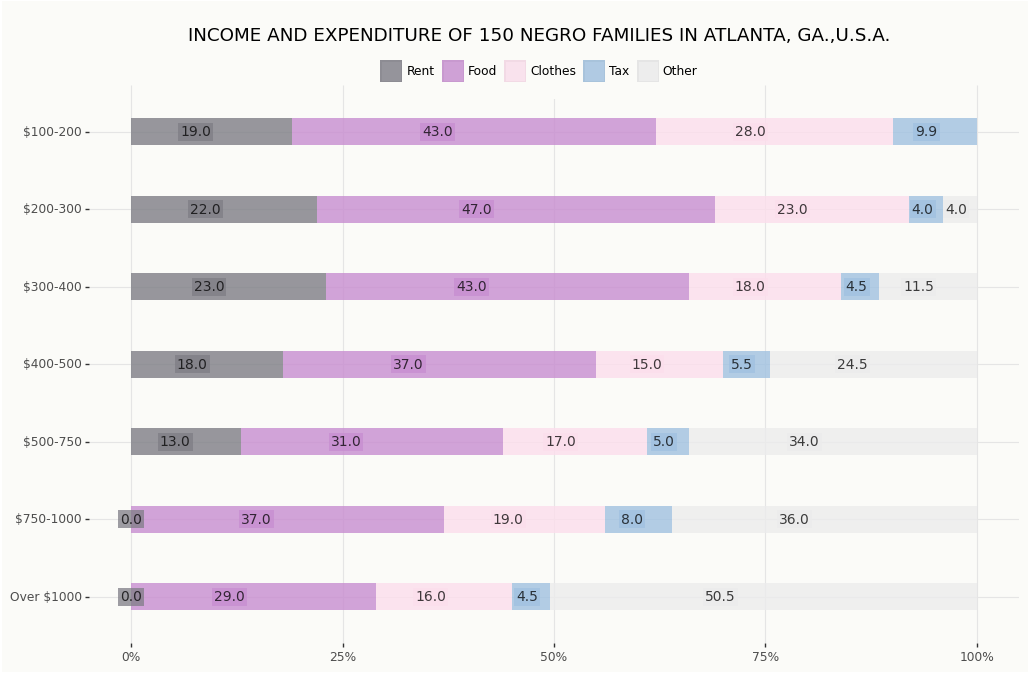

<ggplot: (8785539486817)>

In [ ]:
colors = ['#ECECEC','#A0C1E0','#FCDEEC','#C78DD0','#7E7D85']

p = ggplot(data=data5,
           mapping = aes(x='Class', y='value',label = 'value', fill='variable'))
p + geom_bar(position='fill', mapping=aes(y='value',label = 'value'), stat='identity', width=0.35, alpha=0.8) +\
  geom_label(mapping=aes(label='value'),position=position_fill(vjust=0.4), size=10,\
             boxstyle='square', label_size=0, alpha=0.75, label_padding=.15, show_legend=False) +\
  coord_flip() +\
  xlim('Over $1000','$750-1000','$500-750','$400-500','$300-400','$200-300','$100-200') +\
  scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +\
  scale_fill_manual(values=colors) +\
  labs(x = '', y = '',
       title = '\nINCOME AND EXPENDITURE OF 150 NEGRO FAMILIES IN ATLANTA, GA.,U.S.A.\n\n') +\
  theme_bw() + theme(plot_background=element_rect(fill='#FBFBF8'), panel_background=element_rect(fill='#FBFBF8'),\
                     aspect_ratio = 6/10, axis_ticks=None, panel_border = element_blank(),\
                     panel_grid_minor_x=element_blank(),strip_text_y=None,panel_grid_minor=None, axis_line=None,\
                     legend_title=element_blank(),legend_direction='horizontal', legend_position = (0.5,0.9),\
                     figure_size = (12,10), legend_background=element_rect(fill='#FBFBF8'),plot_title = element_text(face='light'),) +\
  guides(fill = guide_legend(reverse=True))

### Save plot

In [ ]:
# Save plot as variable
figure = \
p + geom_bar(position='fill', mapping=aes(y='value',label = 'value'), stat='identity', width=0.35, alpha=0.8) +\
  geom_label(mapping=aes(label='value'),position=position_fill(vjust=0.4), size=10,\
             boxstyle='square', label_size=0, alpha=0.75, label_padding=.15, show_legend=False) +\
  coord_flip() +\
  xlim('Over $1000','$750-1000','$500-750','$400-500','$300-400','$200-300','$100-200') +\
  scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +\
  scale_fill_manual(values=colors) +\
  labs(x = '', y = '',
       title = '\nINCOME AND EXPENDITURE OF 150 NEGRO FAMILIES IN ATLANTA, GA.,U.S.A.\n\n') +\
  theme_bw() + theme(plot_background=element_rect(fill='#FBFBF8'),\
                     aspect_ratio = 6/10, axis_ticks=None, panel_border = element_blank(),\
                     panel_grid_minor_x=element_blank(),strip_text_y=None,panel_grid_minor=None, axis_line=None,\
                     legend_title=element_blank(),legend_direction='horizontal', legend_position = (0.5,0.9),\
                     figure_size = (12,10),plot_title = element_text(face='light'),) +\
  guides(fill = guide_legend(reverse=True))

In [ ]:
figurefolder = '/content/gdrive/MyDrive/Colab Notebooks/DATA340/assignments/Assignment 1'
figure.save(filename='DuBois_Challenge5.png', path=figurefolder)

### View PNG in notebook

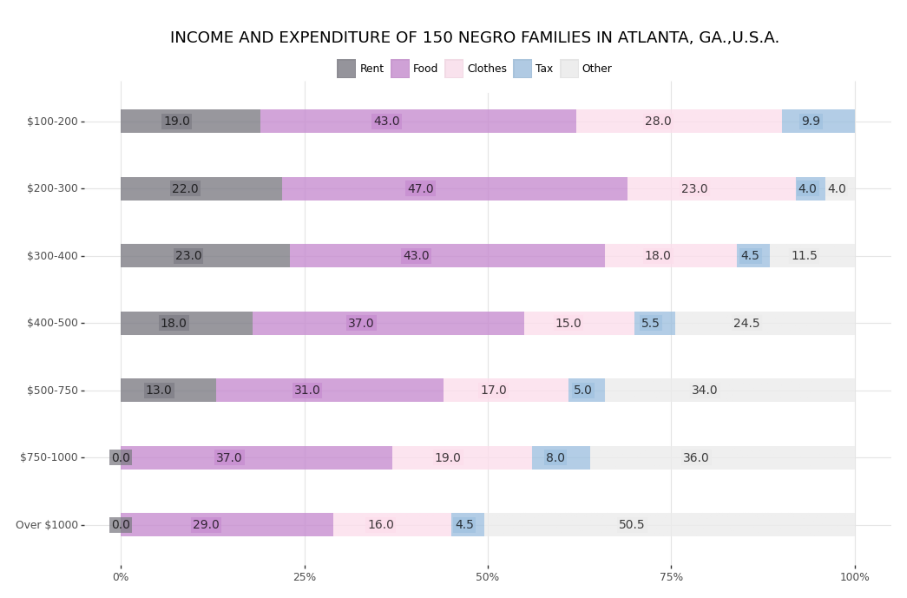

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
img = mpimg.imread('/content/gdrive/MyDrive/Colab Notebooks/DATA340/assignments/Assignment 1/DuBois_Challenge5.png')
 
# Output Images
plt.figure(figsize=(16,12))
plt.axis('off')
plt.imshow(img)
plt.show()

### Write-up


Most of the tweaks that could make this chart a more precise replica are aesthetic. 

I was unable to figure out how to concatenate a percent sign to the bar chart labels, so I added percentage markers to the x-axis as a workaround. I would also remove the '0.0' labels; to get around those labels overlapping other bars, I added a semi-transparent label background to make the distinction between labels more clear. Further, I did not display the 'Actual Average' data, which makes this chart, by category, less informative than the original. 

To make the chart exact, I would also include the graphic elements (images, contextual text, etc.) that DuBois used to build the legend.  

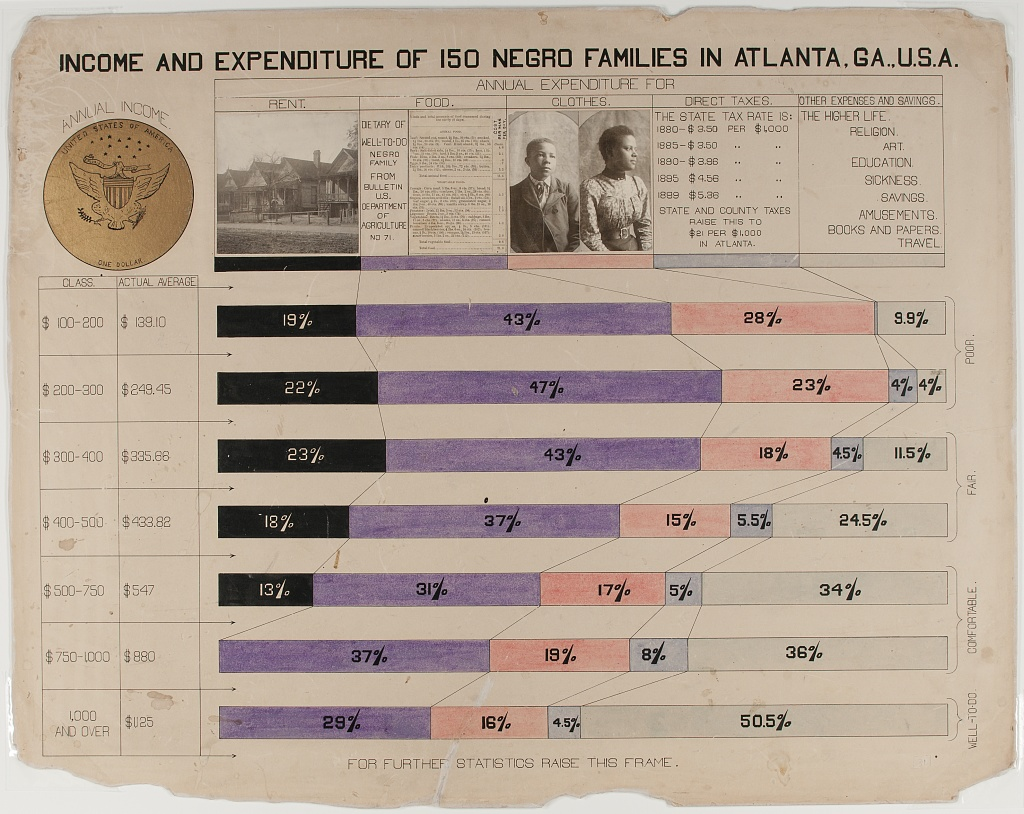